In [88]:
# SVM Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split



In [89]:
df=pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [90]:
df[df.duplicated()]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,1279,bell,smooth,pink,no,foul,notched,distant,broad,pink,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,1275,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,549,conical,grooves,brown,no,foul,free,distant,broad,white,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,1198,sunken,smooth,white,no,anise,attached,crowded,broad,black,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,618,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,871,flat,scaly,pink,no,spicy,attached,distant,narrow,red,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [91]:
df=df.drop_duplicates()

In [92]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


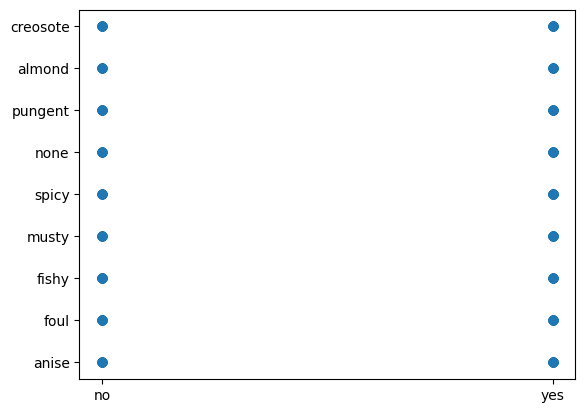

In [93]:
plt.scatter(df['bruises'],df['odor'])

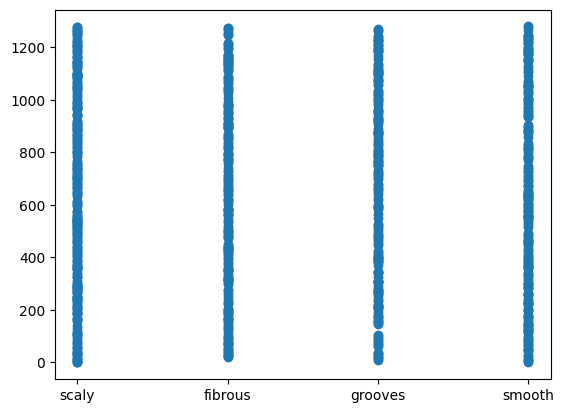

In [94]:


plt.scatter(df['cap_surface'],df['Unnamed: 0'])

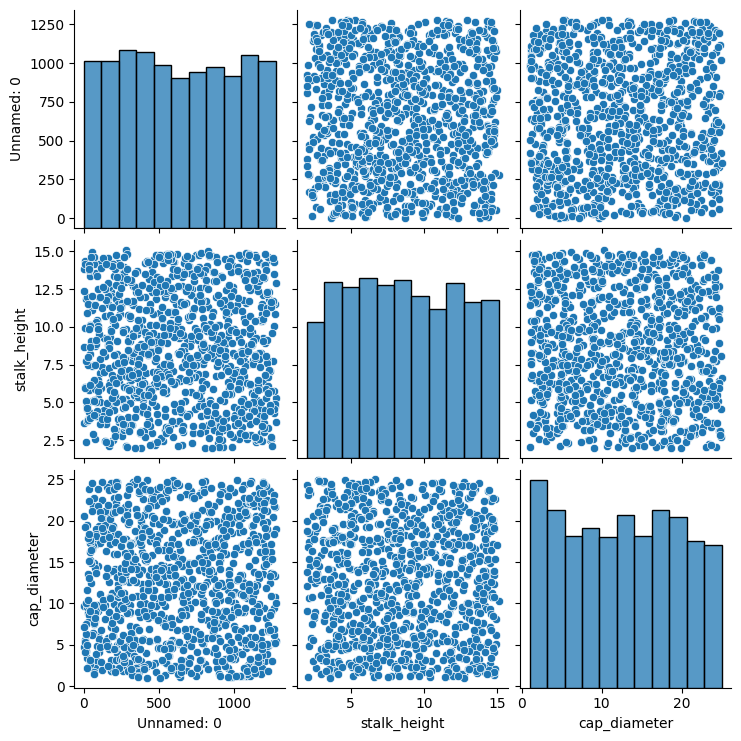

In [95]:
sns.pairplot(df)

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


In [97]:

array=df.values
x=array[:,0:22]
y=array[:,22]


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [99]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.12627986348122866
[[ 0  0  0 45  0  0  0]
 [ 0  0  0 33  0  0  0]
 [ 0  0  0 46  0  0  0]
 [ 0  0  0 37  0  0  0]
 [ 0  0  0 49  0  0  0]
 [ 0  0  0 45  0  0  0]
 [ 0  0  0 38  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        46
           3       0.13      1.00      0.22        37
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        45
           6       0.00      0.00      0.00        38

    accuracy                           0.13       293
   macro avg       0.02      0.14      0.03       293
weighted avg       0.02      0.13      0.03       293



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


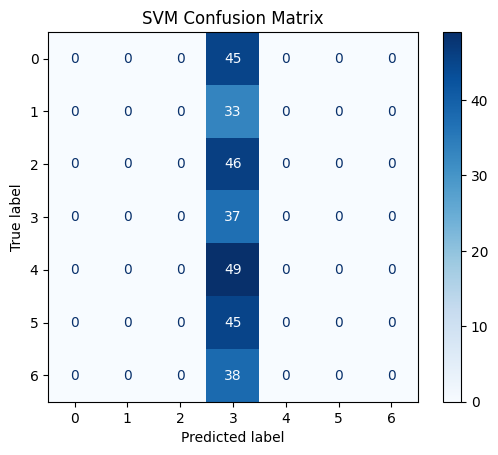

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


In [101]:
#grid search cv
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,'scale'],'C':[15,14,13,12,11,10,0.1,0.001,1.0] }]
gsv = GridSearchCV(clf,param_grid)
gsv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 1.0],
                          'gamma': [50, 5, 10, 0.5, 'scale'],
                          'kernel': ['rbf']}])

In [102]:
gsv.best_params_ ,gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, np.float64(0.16691713181623014))

In [103]:
clf = SVC(C= 15, gamma = 'scale',kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 14.675767918088736


array([[ 8,  0,  0, 26,  0,  0, 11],
       [ 2,  0,  0, 24,  0,  0,  7],
       [ 8,  0,  0, 28,  0,  0, 10],
       [ 5,  0,  0, 23,  0,  0,  9],
       [ 3,  0,  0, 32,  1,  0, 13],
       [ 3,  0,  0, 30,  0,  0, 12],
       [ 4,  0,  0, 23,  0,  0, 11]])

In [104]:
clf = SVC(C= 1, gamma = 'scale',kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 12.627986348122866


array([[ 0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0]])